In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from transformers import AutoTokenizer

import sys

sys.path.append("..")
from src.model import WineBert

In [2]:
# Load checkpoint
wine_bert = WineBert.load_from_checkpoint("../models/bert-mini-finetune-slim.ckpt")

Some weights of the model checkpoint at google/bert_uncased_L-4_H-256_A-4 were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification w

In [3]:
bert_classifier = wine_bert.model
bert_classifier.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 256, padding_idx=0)
      (position_embeddings): Embedding(512, 256)
      (token_type_embeddings): Embedding(2, 256)
      (LayerNorm): LayerNorm((256,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=256, out_features=256, bias=True)
              (key): Linear(in_features=256, out_features=256, bias=True)
              (value): Linear(in_features=256, out_features=256, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=256, out_features=256, bias=True)
              (LayerNorm): LayerNorm((256,), eps=1e-12, element

In [4]:
bert = bert_classifier.bert
classifier = bert_classifier.classifier

In [5]:
bert.encoder.layer[3].output

BertOutput(
  (dense): Linear(in_features=1024, out_features=256, bias=True)
  (LayerNorm): LayerNorm((256,), eps=1e-12, elementwise_affine=True)
  (dropout): Dropout(p=0.1, inplace=False)
)

In [6]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [7]:
text = "The deep red-black color reaches from core to rim. The fragrant nose centers around hot chocolate and candied cherries. Dry on the attack with adequate acidity, the wine shows moderate extraction and medium alcohol that lead to a short finish."
inputs = tokenizer(text, return_tensors="pt")

In [8]:
inputs

{'input_ids': tensor([[  101,  1996,  2784,  2417,  1011,  2304,  3609,  6561,  2013,  4563,
          2000, 11418,  1012,  1996, 25312, 18980,  4451,  6401,  2105,  2980,
          7967,  1998, 27467,  2098, 24188,  5134,  1012,  4318,  2006,  1996,
          2886,  2007, 11706,  5648,  3012,  1010,  1996,  4511,  3065,  8777,
         14676,  1998,  5396,  6544,  2008,  2599,  2000,  1037,  2460,  3926,
          1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1]])}

In [9]:
inputs["input_ids"].shape

torch.Size([1, 52])

In [10]:
def convert_id_to_vocab(tokenizer, input_ids):
    vocab = tokenizer.get_vocab()
    id_to_token = {v: k for k, v in vocab.items()}
    tokens = []
    for row in input_ids:
        token = [id_to_token[int(i)] for i in row]
        tokens += [token]
    return tokens

In [11]:
tokens = convert_id_to_vocab(tokenizer, inputs["input_ids"])

In [12]:
output = bert(**inputs)

In [13]:
output

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-1.1698, -0.6812,  0.4613,  ...,  0.5151,  0.5006, -0.4524],
         [-1.8724, -0.8934,  1.2267,  ..., -0.7405,  0.1288, -2.2521],
         [ 0.0290, -0.3335,  0.5898,  ...,  1.1127,  0.1469, -0.9737],
         ...,
         [ 0.0621, -0.0561,  1.3614,  ...,  1.2573,  0.1305, -1.2296],
         [-0.3848, -0.4755,  0.7629,  ...,  0.9349,  0.3439, -0.5901],
         [-1.5469, -0.7537,  0.9267,  ..., -0.2165,  0.7236, -0.5530]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[-0.9571, -0.8636,  1.0000,  0.9916,  0.9923, -0.4283,  0.9444,  0.1384,
         -0.9982, -0.9887,  0.2863, -0.8664, -0.2668, -0.9997,  0.9876,  0.9876,
         -0.3717, -0.4933,  1.0000,  0.9993,  1.0000, -0.9908, -0.9174, -0.9979,
         -1.0000, -0.8681,  0.9989,  0.9967,  0.5909, -0.9992, -0.9999, -0.9990,
          0.0474, -0.9353,  0.9958,  0.9988, -0.2013,  0.9997,  0.9948,  0.9409,
         -0.9574,  0.5177,  0.99

In [14]:
output.last_hidden_state.shape

torch.Size([1, 52, 256])

In [15]:
class LayerHook:
    """A hook to get the activations and gradients of given layers.

    Args:
        model (nn.Module): The model to hook.
        target_layers (list): The layers to hook.
    """

    def __init__(self, model, target_layers):
        self.model = model
        self.backwards = []
        self.forwards = []
        self.hooks = []
        for layer in target_layers:
            self.hooks += [layer.register_forward_hook(self._save_forward)]
            self.hooks += [layer.register_full_backward_hook(self._save_backward)]

    def _save_forward(self, module, input, output):
        """Save the forward activations."""
        self.forwards += [output[0].cpu().detach()]

    def _save_backward(self, module, grad_input, grad_output):
        """Save the backward gradients."""
        self.backwards = [grad_output[0].cpu().detach()] + self.backwards

    def __call__(self, **kwargs):
        """Call the model and save the activations and gradients.

        Args:
            **kwargs: The inputs to the model.

        Returns:
            The output of the model.
        """
        self.backwards = []
        self.forwards = []
        return self.model(**kwargs)

    def release(self):
        """Release the hooks."""
        [hook.remove() for hook in self.hooks]

In [16]:
layerhook = LayerHook(bert_classifier, [bert.encoder.layer[3]])

In [17]:
output = layerhook(**inputs)
# output

In [18]:
layerhook.forwards[0].shape

torch.Size([1, 52, 256])

In [19]:
class GradCAMForBert:
    """GradCAM algorithm for BERT.

    Args:
        model (nn.Module): BERT model.
        targer_layers (list): Target layers for GradCAM.
    """

    def __init__(self, model, targer_layers):
        self.model = model
        self.model.eval()
        self.target_layers = targer_layers
        self.layer_hook = LayerHook(model, targer_layers)

    def __call__(self, inputs, target_category=None, avg_layers=True):
        """Compute GradCAM for BERT.

        Args:
            inputs (dict): BERT inputs generated by tokenizer.
            target_category (int): Target category for GradCAM.
            avg_layers (bool): Average GradCAM across layers.

        Returns:
            gradcam (np.ndarray): GradCAM for BERT.
                if avg_layers is True, gradcam.shape = (1, seq_len)
                otherwise, gradcam.shape = (num_layers, seq_len)
        """
        # Forward
        input_tensor = inputs["input_ids"]

        output = self.layer_hook(**inputs)
        logits = output.logits

        # If target category is int, we extend it to a list.
        if isinstance(target_category, int):
            target_category = [target_category] * input_tensor.size(0)

        # If target category is not specified, take the highest scoring category.
        if target_category is None:
            target_category = np.argmax(logits.cpu().detach().numpy(), axis=-1)
            print(
                f"target_category not provided, use top 1 predictions: {target_category}"
            )

        # Backward
        self.model.zero_grad()
        loss = 0
        for i, c in enumerate(target_category):
            loss = loss + logits[i, c]
        loss.backward(retain_graph=True)

        # Calculate GradCAM
        cams = []

        # For each target layer, calculate GradCAM
        forwards, backwards = self.layer_hook.forwards, self.layer_hook.backwards
        for f, b in zip(forwards, backwards):
            weight = np.mean(b.numpy(), axis=2, keepdims=True)  # b is grad
            weight_f = weight * f.numpy()
            cam = weight_f.sum(axis=2)
            cam[cam < 0] = 0  # ReLU
            # Normalize by row
            cam = (cam - cam.min(axis=1, keepdims=True)) / (
                cam.max(axis=1, keepdims=True) - cam.min(axis=1, keepdims=True)
            )
            cams += [cam]

        # concat all cams to a single ndarray
        cams = np.concatenate(cams, axis=0)
        if avg_layers:
            cams = cams.mean(axis=0, keepdims=True)  # Average multi layer cam

        return cams

In [20]:
gradcam = GradCAMForBert(
    bert_classifier,
    [bert.encoder.layer[0], bert.encoder.layer[1], bert.encoder.layer[2]],
)

In [21]:
def aggregate_wordpiece(token, cams, remove_cls_sep=True):
    """Aggregate tokens that are tokenized by wordpiece.

    We assume that word pieces are using ## as the slicing indicator.

    Args:
        token (list): List of tokens.
        cams (np.array): GradCAM scores.
        remove_cls_sep (bool, optional): Remove [CLS] and [SEP] tokens. Defaults to True.
    """
    agg = []
    cur_tc = None
    for t, c in zip(token, cams.T):
        if t.startswith("##"):
            cur_tc[0] += t[2:]
            cur_tc[1] += c
        else:
            if cur_tc is not None:
                agg += [tuple(cur_tc)]
            cur_tc = [t, c]
    agg += [tuple(cur_tc)]
    if remove_cls_sep:
        agg = agg[1:-2]
    agg_token, agg_cams_T = list(zip(*agg))
    return agg_token, np.stack(agg_cams_T).T

In [22]:
def plot_cam(token, cams, agg_wordpiece=True, remove_cls_sep=True):
    """Plot GradCAM scores.

    Args:
        token (list): List of tokens.
        cams (np.array): GradCAM scores.
        agg_wordpiece (bool, optional): Aggregate wordpiece tokens. Defaults to True.
        remove_cls_sep (bool, optional): Remove [CLS] and [SEP] tokens. Defaults to True.
    """
    plt.figure(figsize=(15, 10))
    if agg_wordpiece:
        token, cams = aggregate_wordpiece(token, cams, remove_cls_sep)
    xpos = range(len(token))
    ypos = range(len(cams))
    plt.imshow(cams, cmap="YlGnBu")
    plt.xticks(xpos, token, rotation=90)
    plt.yticks(ypos, [f"layer_{i}" for i in ypos])

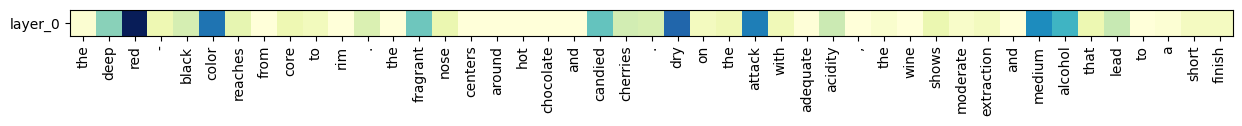

In [23]:
cams_true_label = gradcam(inputs, target_category=265, avg_layers=True)
plot_cam(tokens[0], cams_true_label)

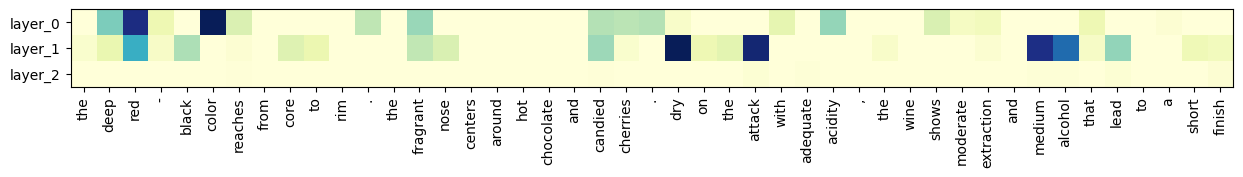

In [24]:
cams_true_label = gradcam(inputs, target_category=265, avg_layers=False)
plot_cam(tokens[0], cams_true_label)

target_category not provided, use top 1 predictions: [441]


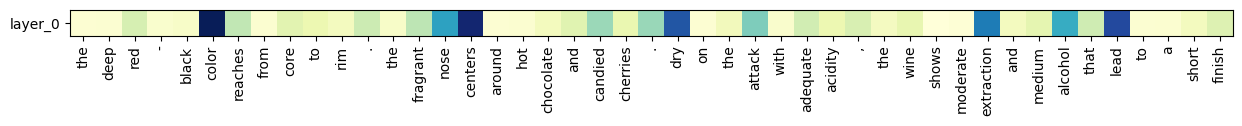

In [25]:
cams_top1 = gradcam(inputs, target_category=None, avg_layers=True)
plot_cam(tokens[0], cams_top1)

target_category not provided, use top 1 predictions: [441]


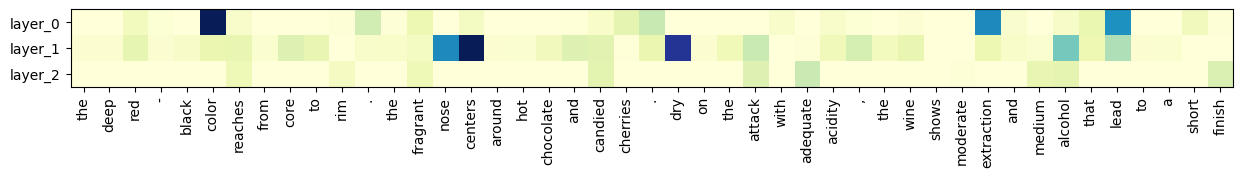

In [26]:
cams_top1 = gradcam(inputs, target_category=None, avg_layers=False)
plot_cam(tokens[0], cams_top1)